# LEADING BIKES MOBILITY SERVICE PROVIDER

Problem Statement-
1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands and there intensity of influence on the demand?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [19]:
df =  pd.read_csv("bike_sharing.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [7]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [8]:
df.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [9]:
df.shape

(10886, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


From the info we can infer the type of each column and also that are no null values present in the sample data which we are given.

In [156]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


since using describe we observe that the mean and median of the count variable are not same i.e the distribution is not symmetrical for overall count. 

In [20]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
df = df.astype({'season':'category','holiday':'category','workingday':'category','weather':'category'})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [23]:
df['date'] = df['datetime'].dt.date
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


In [32]:
df1 = df.groupby('date')[['casual','registered','count']].sum()
df1

,casual,registered,count
date,,,
2011-01-01,331,654,985
2011-01-02,131,670,801
2011-01-03,120,1229,1349
2011-01-04,108,1454,1562
2011-01-05,82,1518,1600
...,...,...,...
2012-12-15,767,4280,5047
2012-12-16,538,3248,3786
2012-12-17,212,4373,4585


In [33]:
df1['count'].mean()

4573.412280701755

C:\Users\Ecstasy1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

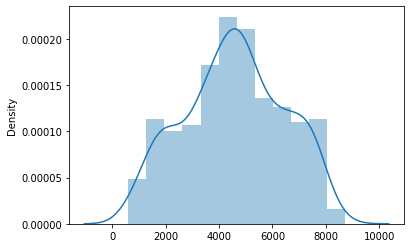

In [30]:
sns.distplot(x = df1['count'])

The displot shows that the chance of the total count of cycle users per day are highest in range (3000,6000) with mean being at 4573. 

<AxesSubplot:xlabel='count'>

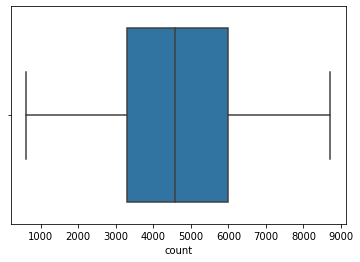

In [39]:
sns.boxplot(x='count',data=df1)

No outliers detected for the total count based on day wise boxplot.

<AxesSubplot:ylabel='Density'>

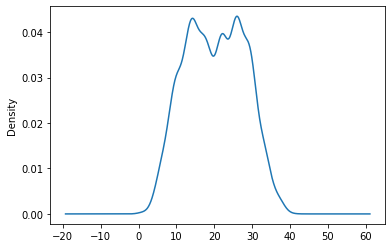

In [157]:
df['temp'].plot(kind='kde')

The plot seems to have random distribution and not of any special type.

<AxesSubplot:ylabel='Density'>

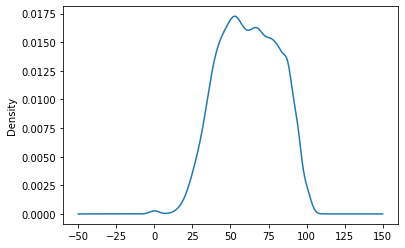

In [158]:
df['humidity'].plot(kind='kde')

The distribution may be normal for the humidity sample data but can't say surely by kde plot

<AxesSubplot:ylabel='Density'>

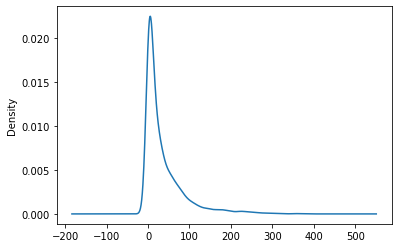

In [159]:
df['casual'].plot(kind='kde')

The plot looks skewed but sort of normal type distribution can't just by seeing the plot.

<AxesSubplot:xlabel='casual'>

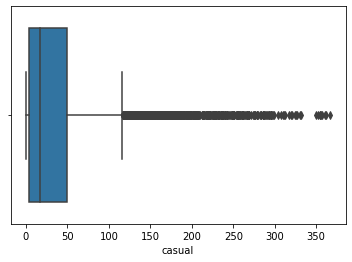

In [163]:
sns.boxplot(x='casual',data=df)

There are many outliers but mainly the outliers can be considered here in this case above 350 ones for the no. of casual users per hour.

<AxesSubplot:ylabel='Density'>

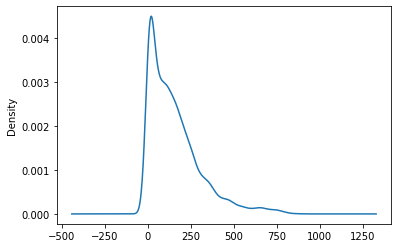

In [160]:
df['registered'].plot(kind='kde')

This plot also looks skewed but sort of normal type distribution can't just by seeing the plot.

<AxesSubplot:xlabel='registered'>

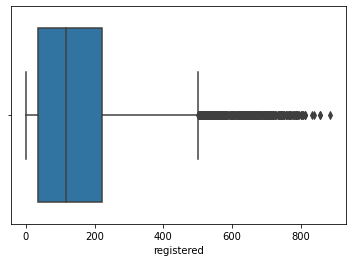

In [166]:
sns.boxplot(x='registered',data=df)

There are many outliers but mainly the outliers can be considered here in this case above 800 ones for the no. of registered users per hour.

In [43]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


In [51]:
df = df.drop(columns=['datetime'],axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


<AxesSubplot:xlabel='season', ylabel='count'>

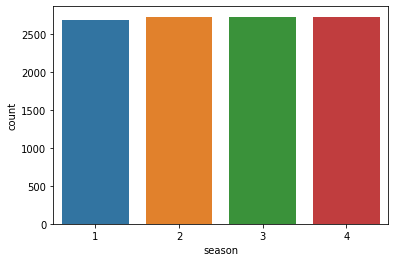

In [53]:
#Lets analyse the season variable and combine it with count to establish an overall relationship
sns.countplot(x= 'season',data=df)

The following plot shows that all season have almost equal number of data points.

In [115]:
df_season1 = df.loc[df['season']==1]
season1_count = df_season1.groupby('date')['count'].sum()
season1_count

date
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-03-15    6192
2012-03-16    4378
2012-03-17    7836
2012-03-18    5892
2012-03-19    6153
Name: count, Length: 114, dtype: int64

In [116]:
df_season2 = df.loc[df['season']==2]
season2_count = df_season2.groupby('date')['count'].sum()
season2_count

date
2011-04-01    2227
2011-04-02    2252
2011-04-03    3249
2011-04-04    3115
2011-04-05    1795
              ... 
2012-06-15    7665
2012-06-16    7702
2012-06-17    6978
2012-06-18    5099
2012-06-19    6825
Name: count, Length: 114, dtype: int64

In [117]:
df_season3 = df.loc[df['season']==3]
season3_count = df_season3.groupby('date')['count'].sum()
season3_count

date
2011-07-01    5362
2011-07-02    5119
2011-07-03    4649
2011-07-04    6043
2011-07-05    4665
              ... 
2012-09-15    8714
2012-09-16    7333
2012-09-17    6869
2012-09-18    4073
2012-09-19    7591
Name: count, Length: 114, dtype: int64

In [118]:
df_season4 = df.loc[df['season']==4]
season4_count = df_season4.groupby('date')['count'].sum()
season4_count

date
2011-10-01    2429
2011-10-02    2918
2011-10-03    3570
2011-10-04    4456
2011-10-05    4826
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Name: count, Length: 114, dtype: int64

In [120]:
season_count = [season1_count.mean(),season2_count.mean(),season3_count.mean(),season4_count.mean()]
season_count

[2741.2105263157896, 5160.368421052632, 5619.8421052631575, 4772.228070175439]

<AxesSubplot:>

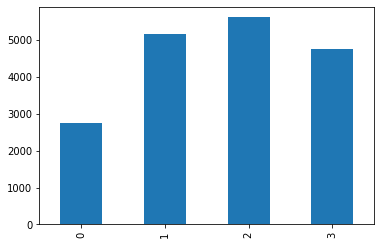

In [121]:
pd.Series(season_count).plot(kind='bar')

The above plot shows that season 3 has the highest avg number of users per day while season 1 has the lowest avg number of users per day.
so the plot clearly shows that seasons do affect the number of users of yulu cycles.

<AxesSubplot:xlabel='holiday', ylabel='count'>

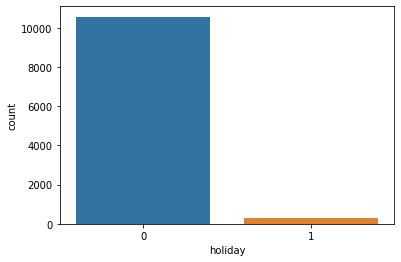

In [56]:
#Lets analyse the holiday variable and combine it with count to establish an overall relationship
sns.countplot(x= 'holiday',data=df)

Most of the days are non-holiday days

In [109]:
df_holiday = df.loc[df['holiday']==1]
holiday_count = df_holiday.groupby('date')['count'].sum()
holiday_count

date
2011-01-17    1000
2011-04-15    3126
2011-07-04    6043
2011-09-05    3351
2011-10-10    5117
2011-11-11    3368
2012-01-02    1951
2012-01-16    2298
2012-04-16    6370
2012-07-04    7403
2012-09-03    6034
2012-10-08    5478
2012-11-12    6269
Name: count, dtype: int64

In [110]:
df_non_holiday = df.loc[df['holiday']==0]
non_holiday_count = df_non_holiday.groupby('date')['count'].sum()
non_holiday_count

date
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Name: count, Length: 443, dtype: int64

In [112]:
holiday_count_analysis = [holiday_count.mean(),non_holiday_count.mean()]
holiday_count_analysis

[4446.7692307692305, 4577.128668171557]

<AxesSubplot:>

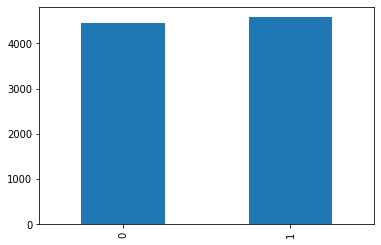

In [113]:
pd.Series(holiday_count_analysis).plot(kind='bar')

From the plot we can observe that there is no big difference in the number of users of cycle whether its a holiday or a non holiday from the sample data but still non holiday days have higher users count as compared to holiday.

<AxesSubplot:xlabel='weather', ylabel='count'>

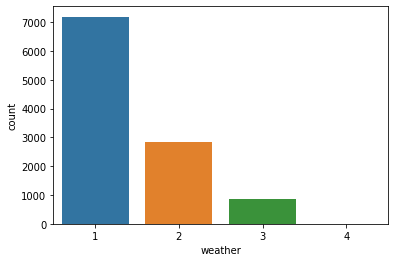

In [58]:
#Lets analyse the weather variable and combine it with count to establish an overall relationship
sns.countplot(x= 'weather',data=df)

The plot shows that most probably the weather is of 1st type and least of 4th type.

In [86]:
df_weather_1 = df.loc[df['weather']==1]
weather1_count = df_weather_1.groupby('date')['count'].sum()
weather1_count

date
2011-01-01     305
2011-01-02     165
2011-01-03    1349
2011-01-04    1520
2011-01-05    1600
              ... 
2012-12-14    5611
2012-12-15    4422
2012-12-16     109
2012-12-18    5204
2012-12-19    5267
Name: count, Length: 434, dtype: int64

In [87]:
df_weather_2 = df.loc[df['weather']==2]
weather2_count = df_weather_2.groupby('date')['count'].sum()
weather2_count

date
2011-01-01     608
2011-01-02     417
2011-01-04      42
2011-01-06     381
2011-01-07     706
              ... 
2012-12-13     106
2012-12-15     625
2012-12-16    3474
2012-12-17    4231
2012-12-18      40
Name: count, Length: 346, dtype: int64

In [88]:
df_weather_3 = df.loc[df['weather']==3]
weather3_count = df_weather_3.groupby('date')['count'].sum()
weather3_count

date
2011-01-01     72
2011-01-02    219
2011-01-07      5
2011-01-08     43
2011-01-11    246
             ... 
2012-12-10    547
2012-12-11     75
2012-12-16    203
2012-12-17    354
2012-12-18    313
Name: count, Length: 187, dtype: int64

In [89]:
df_weather_4 = df.loc[df['weather']==4]
weather4_count = df_weather_4.groupby('date')['count'].sum()
weather4_count

date
2012-01-09    164
Name: count, dtype: int64

In [90]:
weather_count = [weather1_count.mean(),weather2_count.mean(),weather3_count.mean(),weather4_count.mean()]
weather_count

[3401.0668202764978, 1465.7803468208092, 545.9304812834224, 164.0]

<AxesSubplot:xlabel='weathers', ylabel='avg users per day'>

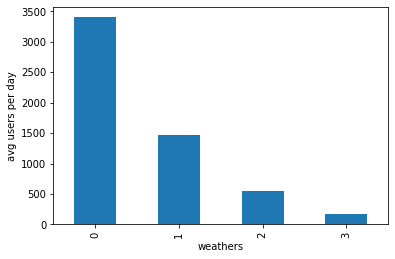

In [108]:
pd.Series([weather1_count.mean(),weather2_count.mean(),weather3_count.mean(),weather4_count.mean()]).plot(kind='bar',xlabel='weathers',ylabel='avg users per day')

From above plot we observe that the highest avg number of users per day are in weather 1 while the least are in weather 4.

<AxesSubplot:xlabel='workingday', ylabel='count'>

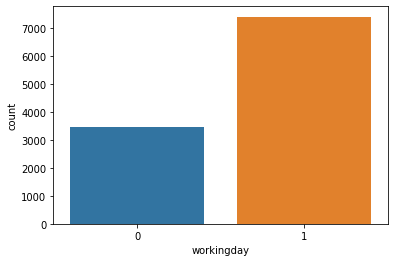

In [64]:
#Lets analyse the working day variable and combine it with count to establish an overall relationship
sns.countplot(x= 'workingday',data=df)

From above plot we can simply infer that majority of the days in our sample are working day

In [85]:
df_work = df.loc[df['workingday']==1]
working_count = df_work.groupby('date')['count'].sum()
working_count

date
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
2011-01-06    1606
2011-01-07    1510
              ... 
2012-12-13    5532
2012-12-14    5611
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Name: count, Length: 311, dtype: int64

In [81]:
df_work = df.loc[df['workingday']==0]
non_working_count = df_work.groupby('date')['count'].sum()
non_working_count

date
2011-01-01     985
2011-01-02     801
2011-01-08     959
2011-01-09     822
2011-01-15    1248
              ... 
2012-12-02    4649
2012-12-08    5582
2012-12-09    3228
2012-12-15    5047
2012-12-16    3786
Name: count, Length: 145, dtype: int64

In [82]:
working_count.mean(),non_working_count.mean()

(4600.012861736334, 4516.358620689655)

<AxesSubplot:>

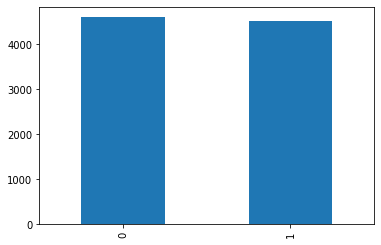

In [83]:
pd.Series([working_count.mean(),non_working_count.mean()]).plot(kind='bar')

The above plot shows that the on an avg users per day is almost similar on working days and non working days since the mean of users per day on working day is around 4600 and for non working day around 4516. But to be specific working days do have more number of users as compare to non working days.

# Using 2 Sample T-Test

In [131]:
#For the test lets first create two sample
working_day = np.array(working_count.values)
non_working_day = np.array(non_working_count.values)

Now lets first validate the assumption of the 2 Sample T-Test i.e if the variance of the two sample is equal or not, as the working days has a bigger data so the ratio of the larger data group to the small data group should be less than 4:1 then we can consider that the given data groups have equal variance.

In [132]:
np.var(working_day)/np.var(non_working_day)

0.877311059104065

so as ratio is less than 4:1 so we can say that the given data groups have equal variance

Lets perform 2 Sample T-Test and Before we proceed lets establish our significance value to be 5%
And our Null Hypothesis (Ho) and Alternate Hypothesis (Ha)
1. Ho: No. of cycles rented are similar whether its a working day or not
2. Ha: No. of cycles rented are different for working and non-working day

In [133]:
stats.ttest_ind(a=working_day,b=non_working_day,equal_var=True)

Ttest_indResult(statistic=0.44477221614881995, pvalue=0.656696335987859)

As we observe that the p-value(0.656696335987859) is much higher than the significance value(0.05) and shows that this result that we observed is very likely to happen if our null hypothesis was true.
So we can confidently fail to reject our null hypothesis and conclude that the No. of cycles rented are similar whether its a working day or not and hence no. of cycles rented are not affected by whether its a working day or non working day. 

# Using ANOVA for Weather

Checking if the count sample of no. of cycles rented of different weather is similar or different in different weather

<AxesSubplot:ylabel='Density'>

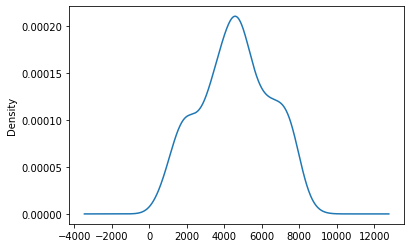

In [122]:
# lets first check the assumptions for anova by ploting the overall distribution of count varible and see if it is gaussian or not
df_weather = df.groupby('date')['count'].sum()
df_weather.plot(kind='kde')

In [123]:
import statsmodels.api as sm

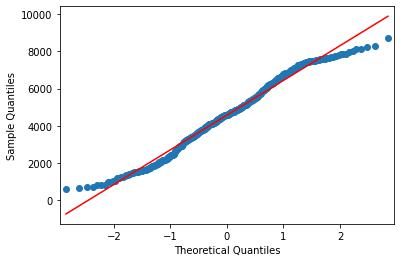

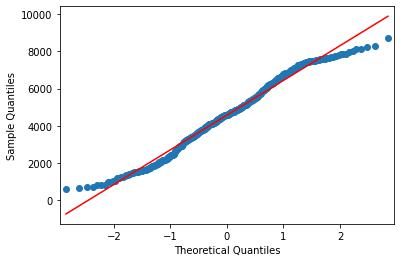

In [124]:
sm.qqplot(df_weather, dist=stats.norm, line='s')

QQ plot shows that it not exactly gaussian but somewhat similar to it except at the edges containing outliers but still we have retain the outliers so that our sample is asa bigger as possible and our hypothesis testing gives more accurate result.

In [154]:
Means_of_the_samples  = [weather1_count.mean(),weather2_count.mean(),weather3_count.mean(),weather4_count.mean()]
Means_of_the_samples

[3401.0668202764978, 1465.7803468208092, 545.9304812834224, 164.0]

There are two more assumptions for anova-
1. The samples are randomly picked which is true for our sample case since no biasing is done.
2. The means of the individual samples are relatively closure to each other but here this assumption is not being followed.

In [125]:
# Now lets apply the annova test to the count variable of different weather
from scipy.stats import f_oneway

Before we proceed lets establish our significance value to be 5%
And our Null Hypothesis (Ho) and Alternate Hypothesis (Ha)
1. Ho: No. of cycles are similar in different weather
2. Ha: No. of cycles are different in different weather

In [128]:
a = weather1_count.values
b = weather2_count.values
c = weather3_count.values
d = weather4_count.values
f_oneway(a,b,c,d)

F_onewayResult(statistic=163.65974098613603, pvalue=9.71529956995491e-86)

As we observe that the p-value(9.71529956995491e-86) is very low than the significance value(0.05) and shows that this result that we observed is very unlikely to happen if our null hypothesis was true.
So we can confidently reject our null hypothesis and conclude that the count sample of no. of cycles rented of different weather is different in different weather.

# Using ANOVA for Season

Checking if the count sample of no. of cycles rented of different weather is similar or different in different season

Here we already know that the distribution is same of overall count and for that we have already checked the assumptions for anova so we will directly do the test for different seasons

Before we proceed lets establish our significance value to be 5%
And our Null Hypothesis (Ho) and Alternate Hypothesis (Ha)
1. Ho: No. of cycles are similar in different season
2. Ha: No. of cycles are different in different season

In [129]:
p = season1_count.values
q = season2_count.values
r = season3_count.values
s = season4_count.values
f_oneway(p,q,r,s)

F_onewayResult(statistic=80.0504789788067, pvalue=1.506580502991204e-41)

As we observe that the p-value(1.506580502991204e-41) is very low than the significance value(0.05) and shows that this result that we observed is very unlikely to happen if our null hypothesis was true.
So we can confidently reject our null hypothesis and conclude that the count sample of no. of cycles rented of different seasons is different in different seasons.

# Using Chi-Square Test

Using Chi-square test to check if Weather is dependent on the season

In [151]:
#Lets first create the table between weather and season to see the count relative to each other
pd.crosstab(df['weather'],df['season'])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


Before we proceed lets establish our significance value to be 5%
And our Null Hypothesis (Ho) and Alternate Hypothesis (Ha)
1. Ho: there is no relation between weather and season variable
2. Ha: there is significant relation between weather and season variable

In [152]:
# Lets perform the test
from scipy.stats import chi2_contingency
data = [[1759,1801,1930,1702],[715,708,604,807],[211,224,199,225]]
stat,p,dof,expected = chi2_contingency(data)
p

2.8260014509929403e-08

As we observe that the p-value(2.8260014509929403e-08) is very low than the significance value(0.05) and shows that this result that we observed is very unlikely to happen if our null hypothesis was true.
So we can confidently reject our null hypothesis and conclude that there is significant relation between weather and season variable and are dependent on each other.

# General Insights

Univariate Analysis Insights
1. The displot shows that the chance of the total count of cycle users per day are highest in range (3000,6000) with mean being at 4573. [cell 30]
2. No outliers detected for the total count based on day wise boxplot but there are ouliers for casual and registered distribution.[cell 39,163,166]
3. The plot shows that all season have almost equal number of data points.[cell 53]
4. Most of the days are non-holiday days in the sample.[cell 56]
5. The plot shows that most probably the weather is of 1st type [Clear, Few clouds, partly cloudy, partly cloudy] and least of 4th type[ Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog].[cell 58]
6. From above plot we can simply infer that majority of the days in our sample are working day [cell 64] 

Bi-variate Analysis Insights
1. The plot shows that season 3[fall] has the highest avg number of users per day while season 1[spring] has the lowest avg number of users per day. So the plot clearly shows that seasons do affect the number of users of yulu cycles.[cell 121]
2. From the plot we can observe that there is no big difference in the number of users of cycle whether its a holiday or a non holiday from the sample data but still non holiday days have higher users count as compared to holiday.[cell 113]
3. From plot we observe that the highest avg number of users per day are in weather 1 while the least are in weather 4.[cell 108]
4. The plot shows that the on an avg users per day is almost similar on working days and non working days since the mean of users per day on working day is around 4600 and for non working day around 4516. But to be specific working days do have more number of users as compare to non working days.[cell 83]

Hypothesis Testing
2 Sample T-Test
1. After applying test we cocluded that no. of cycles rented are not affected by whether its a working day or non working day.
Annova Test
1. For Weather after test we conclude that the count sample of no. of cycles rented of different weather is different in different weather.
2. For Season after test we conclude that the count sample of no. of cycles rented of different seasons is different in different seasons.
Chi-Square Test
1. For weather and season dependency after test we conclude that there is significant relation between weather and season variable and are dependent on each other.

# Recommendation 

1. Number of cycles rented are greatly impacted by weather which we have already proved using annova test and using bi-variate analysis we observed that the numbers are high for Clear, Few clouds, partly cloudy, partly cloudy so we should increase our business in these type of seasons.
2. From bi-variate analysis we also observed that the cycles rented were least in the weather type like  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog so may be can innovate some technicalities in our bike to make them more suitable for these type of wheather to increase the use of our cycles.
3. From annova test we also concluded that number of cycles that are rented were affected by seasons and from bi-variate analysis we observed that the no. was highest for season 3 i.e fall and season 2 i.e summer so we should try to expand our businees in these type of seasons.
4. From our analysis we also observed that the no. of cycles rented were least in season 1 i.e spring and same things can be applied what we applied with rainy weather type like adding some funtionalities to make use of these cycles easier in these type of seasons.
5. Using chi-square test we got that weather and season depend on each other and since the no. of cycles rented depend on these two factors so we can see the overlap and combine weather and season like in summer,fall and weather of type Clear, Few clouds, partly cloudy, partly cloudy are a perfect combination for our cycles but we have to work on spring + weather type Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as they can cause huge reduction in usage of cycles.
6. We dont have to worry about working and non working days since from bi-variate analyses and 2 sample t-test we found that it does not have much affect on no. of cycles rented. 

# Problem Statement Answered

1. Weather and season variable are found to be most significant in predicting the demand for shared electric cycles in the Indian market.
2. Weather and season have a great impact on no. of cycles rented while working days, non working days, holiday, non-holiday these variables have negligible impact on number of cycles rented as per the analysis.

# --Analysis Ends Here--